In [3]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/DL_Dataset/old_dataset.zip"
extract_path = "/content/dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

train_dir = "/content/dataset/tomato/train"
val_dir = "/content/dataset/tomato/val"

Mounted at /content/drive


In [5]:
train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="training"
)

Found 8000 images belonging to 10 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="validation"  # Validation subset
)

Found 2000 images belonging to 10 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle=False for ordered predictions
)

Found 1000 images belonging to 10 classes.


In [ ]:
# First model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn = tf.keras.models.Sequential()

#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(BatchNormalization())

# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())

#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(Dropout(0.25))

# cnn.add(BatchNormalization())

# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())

# Flattening
cnn.add(tf.keras.layers.Flatten())
# cnn.add(BatchNormalization())

#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn.add(BatchNormalization())

#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn.summary()

# Fit

# temp = cnn.fit(x = train_generator, validation_data=test_generator,epochs=5)
temp = cnn.fit(x = train_generator, validation_data=validation_generator,epochs=30)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,319,978 (20.29 MB)

 Trainable params: 5,319,978 (20.29 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 320ms/step - accuracy: 0.3330 - loss: 1.9901 - val_accuracy: 0.7090 - val_loss: 0.8681
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 286ms/step - accuracy: 0.7349 - loss: 0.7837 - val_accuracy: 0.7870 - val_loss: 0.5865
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 286ms/step - accuracy: 0.8037 - loss: 0.5663 - val_accuracy: 0.8255 - val_loss: 0.5091
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 285ms/step - accuracy: 0.8382 - loss: 0.4657 - val_accuracy: 0.8675 - val_loss: 0.3893
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 285ms/step - accuracy: 0.8691 - loss: 0.3814 - val_accuracy: 0.8890 - val_loss: 0.3201
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 285ms/step - accuracy: 0.8799 - loss: 0.3562 - val_accuracy: 0.8775 - val_loss: 0.3709
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 285ms/step - accuracy: 0.8940 - loss: 0.2988 - val_accuracy: 0.8845 - val_loss: 0.3128
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 71s 286ms/step - accuracy: 0.9101 - loss: 0

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=cnn.evaluate(train_generator)
scores2=cnn.evaluate(test_generator)
print("Training Loss is : "+str(scores[0]))
print("Training Accuracy is : "+str(scores[1]*100)+" %")
print("Testing Loss is : "+str(scores2[0]))
print("Testing Accuracy is : "+str(scores2[1]*100)+" %")

250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 226ms/step - accuracy: 0.9585 - loss: 0.1176
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8183 - loss: 0.7840
Training Loss is : 0.11745905131101608
Training Accuracy is : 95.87500095367432 %
Testing Loss is : 0.7068104147911072
Testing Accuracy is : 84.29999947547913 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

<ipython-input-10-7b43c1c7f140>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.98      0.83      0.90       100
                        Tomato___Early_blight       0.82      0.86      0.84       100
                         Tomato___Late_blight       0.90      0.86      0.88       100
                           Tomato___Leaf_Mold       0.96      0.67      0.79       100
                  Tomato___Septoria_leaf_spot       0.87      0.80      0.83       100
Tomato___Spider_mites Two-spotted_spider_mite       0.93      0.65      0.76       100
                         Tomato___Target_Spot       0.81      0.87      0.84       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.89      0.93      0.91       100
                 Tomato___Tomato_mosaic_virus       0.64      1.00      0.78       100
                             Tomato___healthy       0.85      0.96      0.90       100

                                     accu

<Axes: >

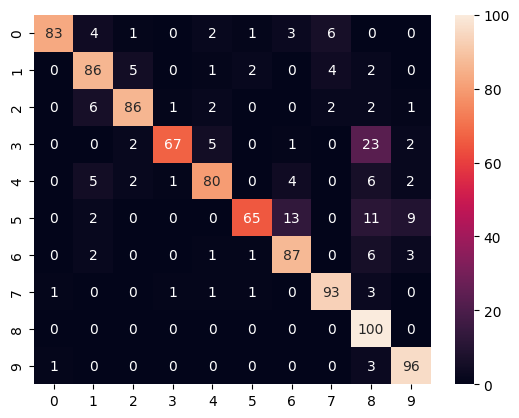

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g')

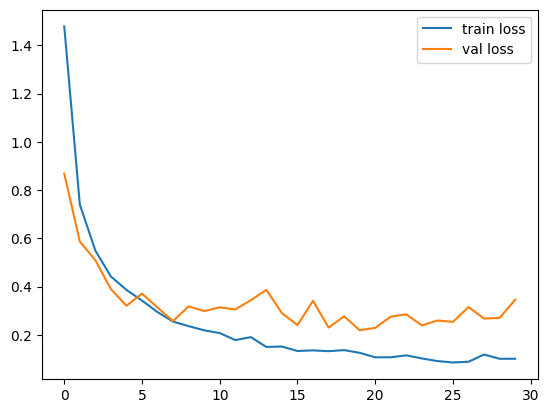

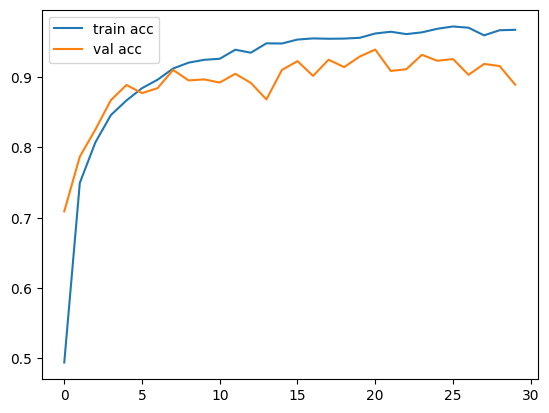

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# CNN Model 2

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten, BatchNormalization

cnn2 = Sequential()

# Convolutional Layers with Batch Normalization
cnn2.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))
cnn2.add(BatchNormalization())  # Normalizing feature maps
cnn2.add(MaxPooling2D(pool_size=2, strides=2))

cnn2.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size=2, strides=2))

# Flattening
cnn2.add(Flatten())

# Fully Connected Layers with Dropout
cnn2.add(Dense(units=128, activation='relu'))
cnn2.add(BatchNormalization())  # Helps stabilize training
cnn2.add(Dropout(0.25))  # Reduces overfitting

cnn2.add(Dense(units=128, activation='relu'))
cnn2.add(Dropout(0.25))  # Additional dropout for better regularization

# Output Layer
cnn2.add(Dense(units=10, activation='softmax'))

# Compile Model (Fixed Loss Function)
cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with batch size 64
temp = cnn2.fit(x=train_generator, validation_data=test_generator, epochs=30, batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 223ms/step - accuracy: 0.5169 - loss: 1.5004 - val_accuracy: 0.1960 - val_loss: 6.3795
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.7914 - loss: 0.6276 - val_accuracy: 0.1900 - val_loss: 6.1382
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 229ms/step - accuracy: 0.8211 - loss: 0.5268 - val_accuracy: 0.6150 - val_loss: 1.3191
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.8597 - loss: 0.4080 - val_accuracy: 0.4190 - val_loss: 2.9186
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.8788 - loss: 0.3587 - val_accuracy: 0.4230 - val_loss: 3.8665
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.8907 - loss: 0.3155 - val_accuracy: 0.7680 - val_loss: 0.8174
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.9009 - loss: 0.2927 - val_accuracy: 0.1850 - val_loss: 11.2049
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.8888 - loss: 

In [9]:
# Scores is just a list containing loss and accuracy value
scores=cnn2.evaluate(train_generator)
scores2=cnn2.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

250/250 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 0.9446 - loss: 0.1648
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8192 - loss: 0.7714
Training Loss is :0.1552034169435501
Training Accuracy is :94.72500085830688 %
Validation Loss is :0.9841051697731018
Validation Accuracy is :78.1000018119812 %


In [10]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn2.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

<ipython-input-10-4696c20952d3>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


In [11]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.95      0.90      0.92       100
                        Tomato___Early_blight       0.73      0.85      0.79       100
                         Tomato___Late_blight       0.97      0.73      0.83       100
                           Tomato___Leaf_Mold       0.92      0.94      0.93       100
                  Tomato___Septoria_leaf_spot       0.69      0.90      0.78       100
Tomato___Spider_mites Two-spotted_spider_mite       0.76      0.56      0.64       100
                         Tomato___Target_Spot       0.97      0.29      0.45       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.84      0.91       100
                 Tomato___Tomato_mosaic_virus       0.92      0.80      0.86       100
                             Tomato___healthy       0.49      1.00      0.65       100

                                     accu

<Axes: >

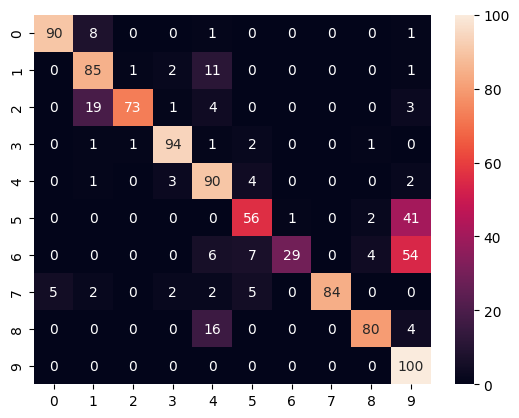

In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g')

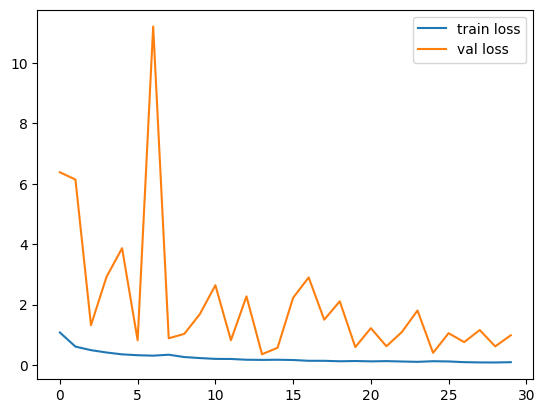

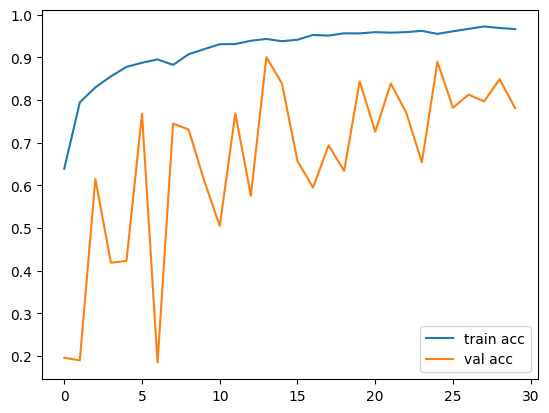

<Figure size 640x480 with 0 Axes>

In [13]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')